# Sparse imaging with LASSO

This example generates a sparse signal and tries to recover it using lasso

In [1]:
from __future__ import print_function
from __future__ import division
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
from simulator import *
%matplotlib inline

We generate an orthogonal matrix X and compute measurements = Xw+z where w is the vectorized format of the sparse image

Text(0.5,1,'Original Sparse Image')

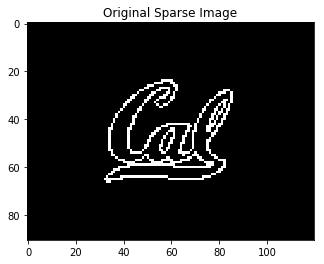

In [2]:
measurements,X,I = simulate() 

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
imDims = (height, width)
sparsity = 476
numPixels = len(X[0])

plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');
plt.title('Original Sparse Image')

We plot matrix X:

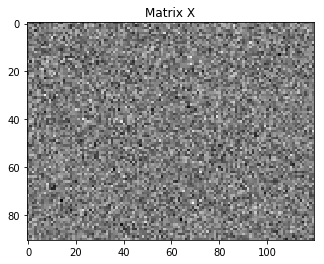

In [3]:
chosenMaskToDisplay = 0
M0 = X[chosenMaskToDisplay].reshape((height,width))
plt.title('Matrix X')
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

And here is the plot of measurement vector:

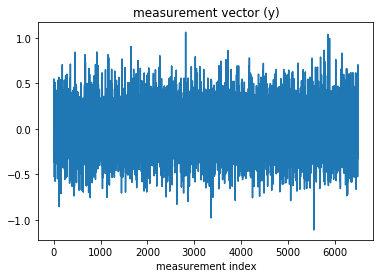

In [4]:
# measurements
plt.title('measurement vector (y)')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

We use lasso to recover the image:

In [5]:
def LASSO(imDims, measurements, X, _lambda):
    clf = linear_model.Lasso(alpha=_lambda)
    clf.fit(X,measurements)
    Ihat = clf.coef_.reshape(imDims)
    plt.title('estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
    return clf.coef_

Change the lasso regularization parameter to recover the image and report the value.